In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/imd-rainfall-dataset-2022/Indian Rainfall Dataset District-wise Daily Measurements.csv


In [2]:
df = pd.read_csv("/kaggle/input/imd-rainfall-dataset-2022/Indian Rainfall Dataset District-wise Daily Measurements.csv")

df.head()

state;"district";"month";"1st";"2nd";"3rd";"4th";"5th";"6th";"7th";"8th";"9th";"10th";"11th";"12th";"13th";"14th";"15th";"16th";"17th";"18th";"19th";"20th";"21st";"22nd";"23rd";"24th";"25th";"26th";"27th";"28th";"29th";"30th";"31st"
0  Andaman & Nicobar;"Nicobars";1;0.0;0.0;0.0;0.0...                                                                                                                                                                                      
1  Andaman & Nicobar;"North And Middle Andaman";1...                                                                                                                                                                                      
2  Andaman & Nicobar;"South Andamans";1;0.0;0.0;0...                                                                                                                                                                                      
3  Andhra Pradesh;"Anantapur";1;0.379965;0.0;0.0;...                                                                                                                                                                                      
4  Andhra Pradesh;"Chittoor";1;14.1449;0.857263;0...

In [3]:
df.shape

(8790, 1)

In [4]:
def split_entries(df):
    
    labels = df.columns[0].split(";")
    
    temp = []
    
    for label in labels:
        temp.append(label.strip('""'))
    
    labels = temp
    
    print(labels)
    
    arr = []
    
    for i in range(len(labels)):
        arr.append([])
    
    for i in range(df.shape[0]):
        temp = df.iloc[i][0].split(";")
        
        for j in range(len(labels)):
            arr[j].append(temp[j])
    
    new_df = pd.DataFrame({labels[i] : arr[i] for i in range(len(labels))})
    
    return new_df
    
new_df = split_entries(df)

new_df.head()

['state', 'district', 'month', '1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th', '11th', '12th', '13th', '14th', '15th', '16th', '17th', '18th', '19th', '20th', '21st', '22nd', '23rd', '24th', '25th', '26th', '27th', '28th', '29th', '30th', '31st']


state                    district month       1st       2nd  \
0  Andaman & Nicobar                  "Nicobars"     1       0.0       0.0   
1  Andaman & Nicobar  "North And Middle Andaman"     1       0.0       0.0   
2  Andaman & Nicobar            "South Andamans"     1       0.0       0.0   
3     Andhra Pradesh                 "Anantapur"     1  0.379965       0.0   
4     Andhra Pradesh                  "Chittoor"     1   14.1449  0.857263   

   3rd  4th  5th  6th  7th  ... 22nd 23rd      24th      25th      26th  \
0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0       0.0       0.0       0.0   
1  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0       0.0       0.0       0.0   
2  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0       0.0       0.0       0.0   
3  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0       0.0       0.0  0.205834   
4  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.615237  0.925098  0.507623   

       27th       28th 29th 30th 31st  
0       0.0        0.0  0.0  0.0  0.0  
1       0.0        0.0  0.0  0.0  0.0  
2       0.0        0.0  0.0  0.0  0.0  
3  0.671002  0.0289937  0.0  0.0  0.0  
4  0.424843   0.737394  0.0  0.0  0.0  

[5 rows x 34 columns]

In [5]:
new_df.describe()

state    district month   1st   2nd   3rd   4th   5th   6th  \
count            8790        8790  8790  8790  8790  8790  8790  8790  8790   
unique             37         854    12  4075  4146  4155  4373  4286  4160   
top     Uttar Pradesh  "Hamirpur"     8   0.0   0.0   0.0   0.0   0.0   0.0   
freq              900          24   734  4679  4600  4592  4368  4467  4590   

         7th  ...  22nd  23rd  24th  25th  26th  27th  28th  29th  30th  31st  
count   8790  ...  8790  8790  8790  8790  8790  8790  8790  8790  8790  8790  
unique  4174  ...  4342  4200  4168  4273  3983  4125  3255  2815  2265  1276  
top      0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
freq    4576  ...  4391  4536  4574  4464  4753  4618  5488  5943  6501  7502  

[4 rows x 34 columns]

Let's try to provide relative spatial data of the various regions by getting their longitude and latitude data

In [6]:
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

counter = 0

lat = []
long = []

for i, city in enumerate(new_df['district']):
    
    print(i)
    
    try:
        
        location = geolocator.geocode(city.strip('""'))
        
        lat.append(float(location.latitude))
        long.append(float(location.longitude))
        
        counter += 1
        
    except:
                    
        lat.append(None)
        long.append(None)
        
        pass
    
# print("The latitude of the location is: ", location.latitude)
# print("The longitude of the location is: ", location.longitude)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
print(f"{counter} or {counter/new_df['district'].shape[0]}%\n")

8603 or 0.9787258248009101%



In [8]:
new_df['longitude'] = long
new_df['latitude'] = lat

In [9]:
new_df.isna().sum()

state          0
district       0
month          0
1st            0
2nd            0
3rd            0
4th            0
5th            0
6th            0
7th            0
8th            0
9th            0
10th           0
11th           0
12th           0
13th           0
14th           0
15th           0
16th           0
17th           0
18th           0
19th           0
20th           0
21st           0
22nd           0
23rd           0
24th           0
25th           0
26th           0
27th           0
28th           0
29th           0
30th           0
31st           0
longitude    187
latitude     187
dtype: int64

In [10]:
new_df.drop(labels=['state', 'district'], inplace=True, axis=1)

In [11]:
new_df.sample(10)

month        1st      2nd        3rd          4th        5th       6th  \
2609     4  0.0278204      0.0        0.0   0.00902365        0.0       0.0   
63       1  0.0272889      0.0        0.0    0.0341096  0.0416399       0.0   
6716    10    3.70125      0.0      4.287       13.446    7.41793  0.235966   
7563    11  0.0458546   1.7962  0.0250748     0.042827   0.136404    32.306   
8733    12        0.0      0.0        0.0          0.0        0.0       0.0   
3403     5        0.0      0.0        0.0      11.1821        0.0   5.72531   
8413    12        0.0      0.0        0.0  1.29034e-05        0.0  0.439197   
2262     4    11.4805  4.14469    2.37396      20.0462    18.2429    21.825   
3387     5    0.10759  6.42344    0.96144      0.18958  0.0156556   1.40214   
4794     7    5.42569  4.75321    2.94655      12.3648    23.2123   4.29971   

             7th       8th         9th  ...       24th       25th      26th  \
2609         0.0       0.0         0.0  ...  0.0972045  0.0139102  0.013905   
63           0.0       0.0         0.0  ...    0.29997  0.0272889   3.20948   
6716     3.44477   1.79378   0.0926019  ...        0.0        0.0       0.0   
7563     8.90441  0.663651    0.263727  ...        0.0        0.0       0.0   
8733         0.0       0.0         0.0  ...        0.0        0.0       0.0   
3403    0.898507       0.0         0.0  ...   0.617183        0.0       0.0   
8413  0.00788826  0.110684    0.107253  ...        0.0        0.0       0.0   
2262     15.8567    3.1169     11.1099  ...    2.14818   0.181601  0.384983   
3387         0.0  0.335285  0.00449598  ...    18.1924    9.17874       0.0   
4794     3.37761   16.3553     20.9737  ...    9.33843    5.77472    25.571   

           27th       28th        29th     30th 31st  longitude   latitude  
2609    2.64586  0.0180473         0.0  5.23667  0.0  93.623745  24.862587  
63     0.865427    11.1843         0.0      0.0  0.0  80.753845  27.985060  
6716        0.0        0.0         0.0      0.0  0.0  82.646041  22.030842  
7563        0.0        0.0         0.0      0.0  0.0  74.313233  33.377249  
8733        0.0        0.0         0.0      0.0  0.0  77.708101  28.982653  
3403   0.196853        0.0         0.0      0.0  0.0  85.825254  19.807608  
8413        0.0        0.0         0.0      0.0  0.0  81.000000  24.500000  
2262    4.37258    6.78275  0.00391827  17.3512  0.0  92.716060  26.304149  
3387  0.0242767        0.0     4.08022  2.21794  0.0  74.595430  16.027663  
4794     9.7729    1.00151     3.35732      0.0  0.0  77.180847  20.090718  

[10 rows x 34 columns]

In [12]:
def cast_to_float(entry):
    return float(entry)

for col in new_df.columns:
    new_df[col] = new_df[col].apply(cast_to_float)
    print(new_df[col].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


<function ndarray.all>

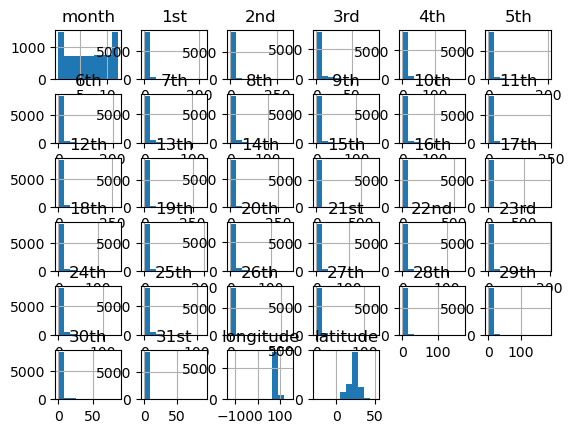

In [13]:
new_df.hist().all

I suspect that the behavior for precipitation will be heavily dependent on the month we look at. Therefore, I want to seperate the df by month and study correlations in this way.

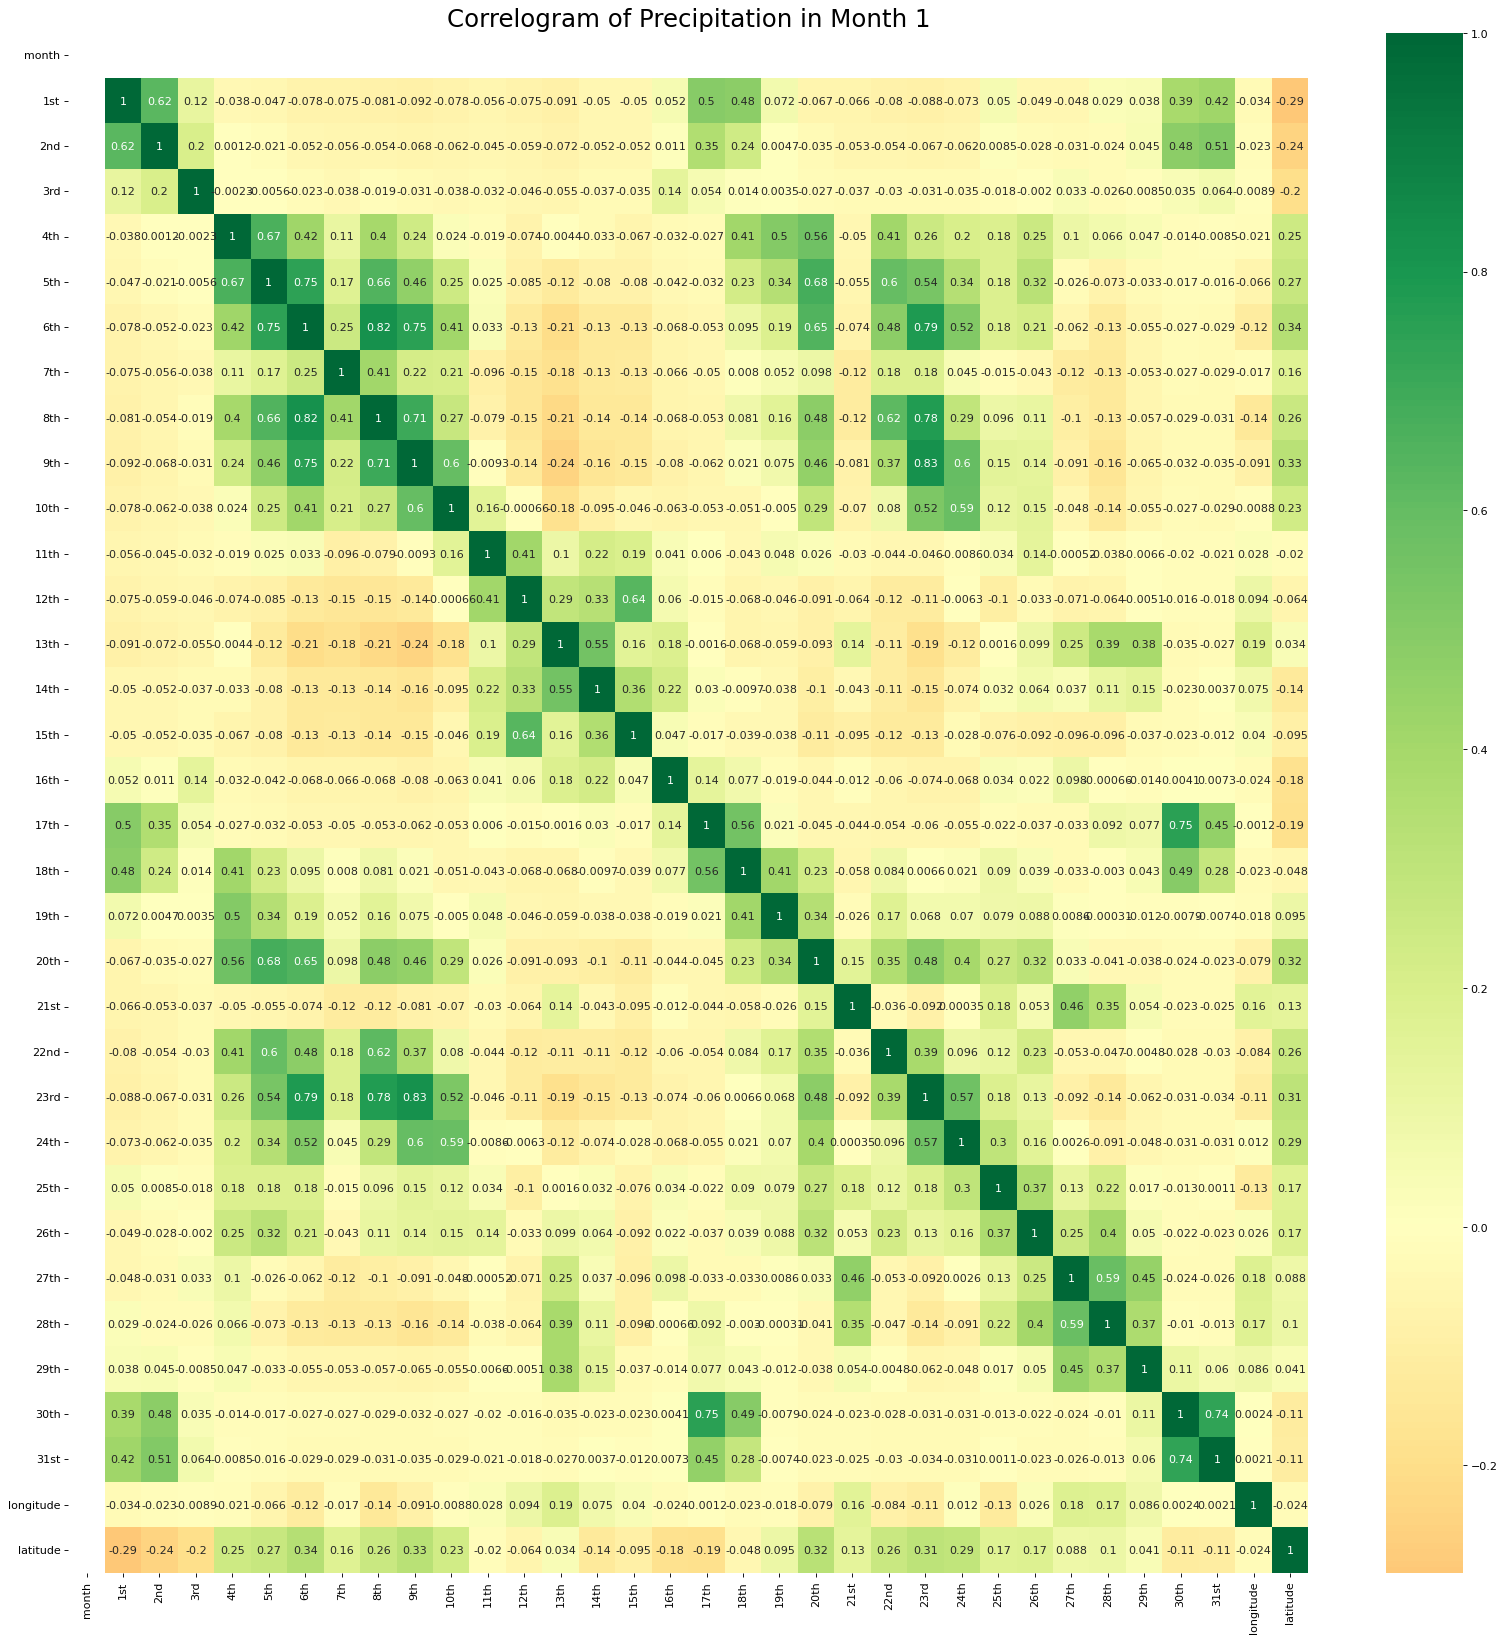

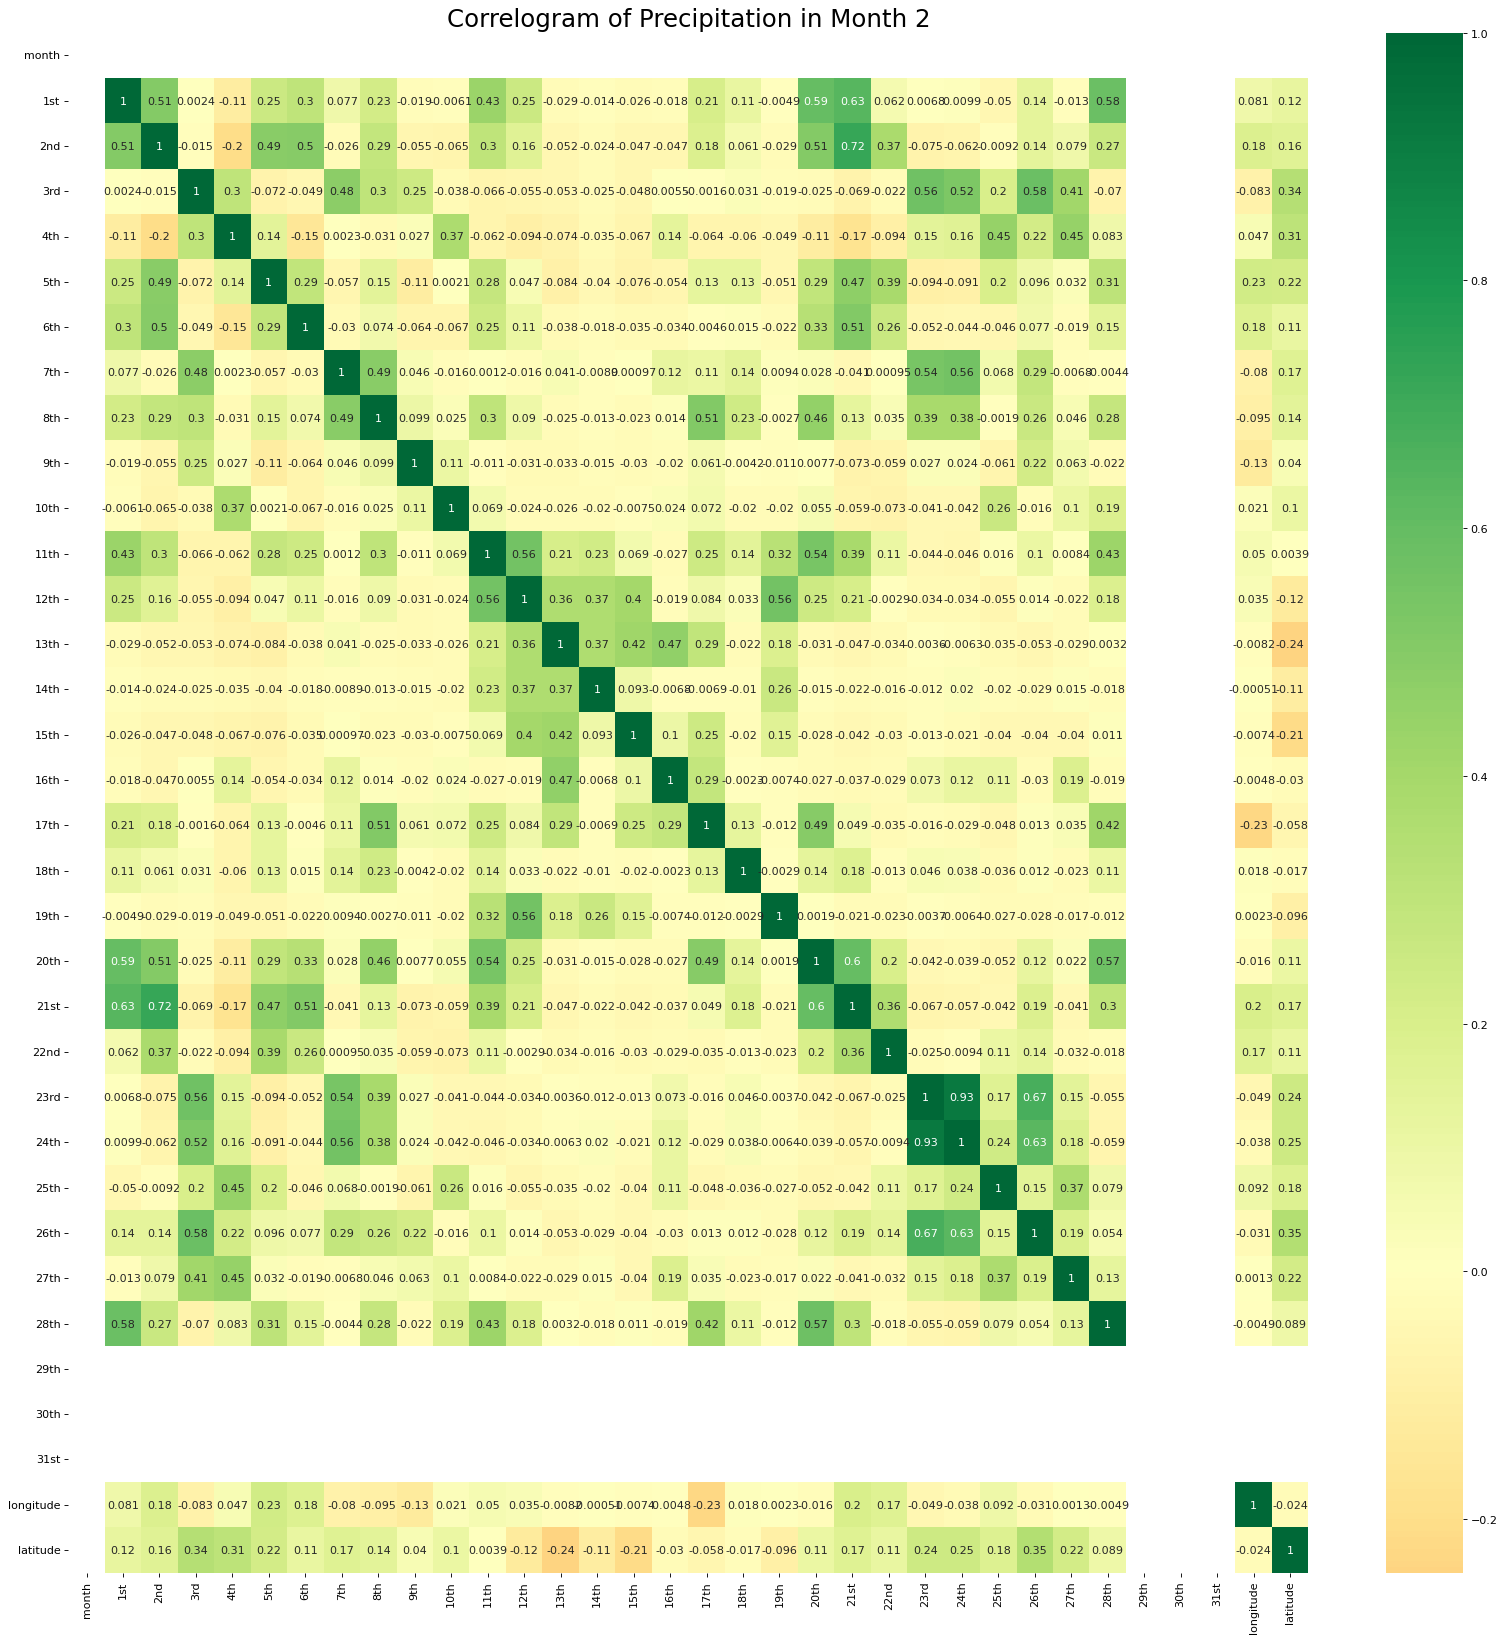

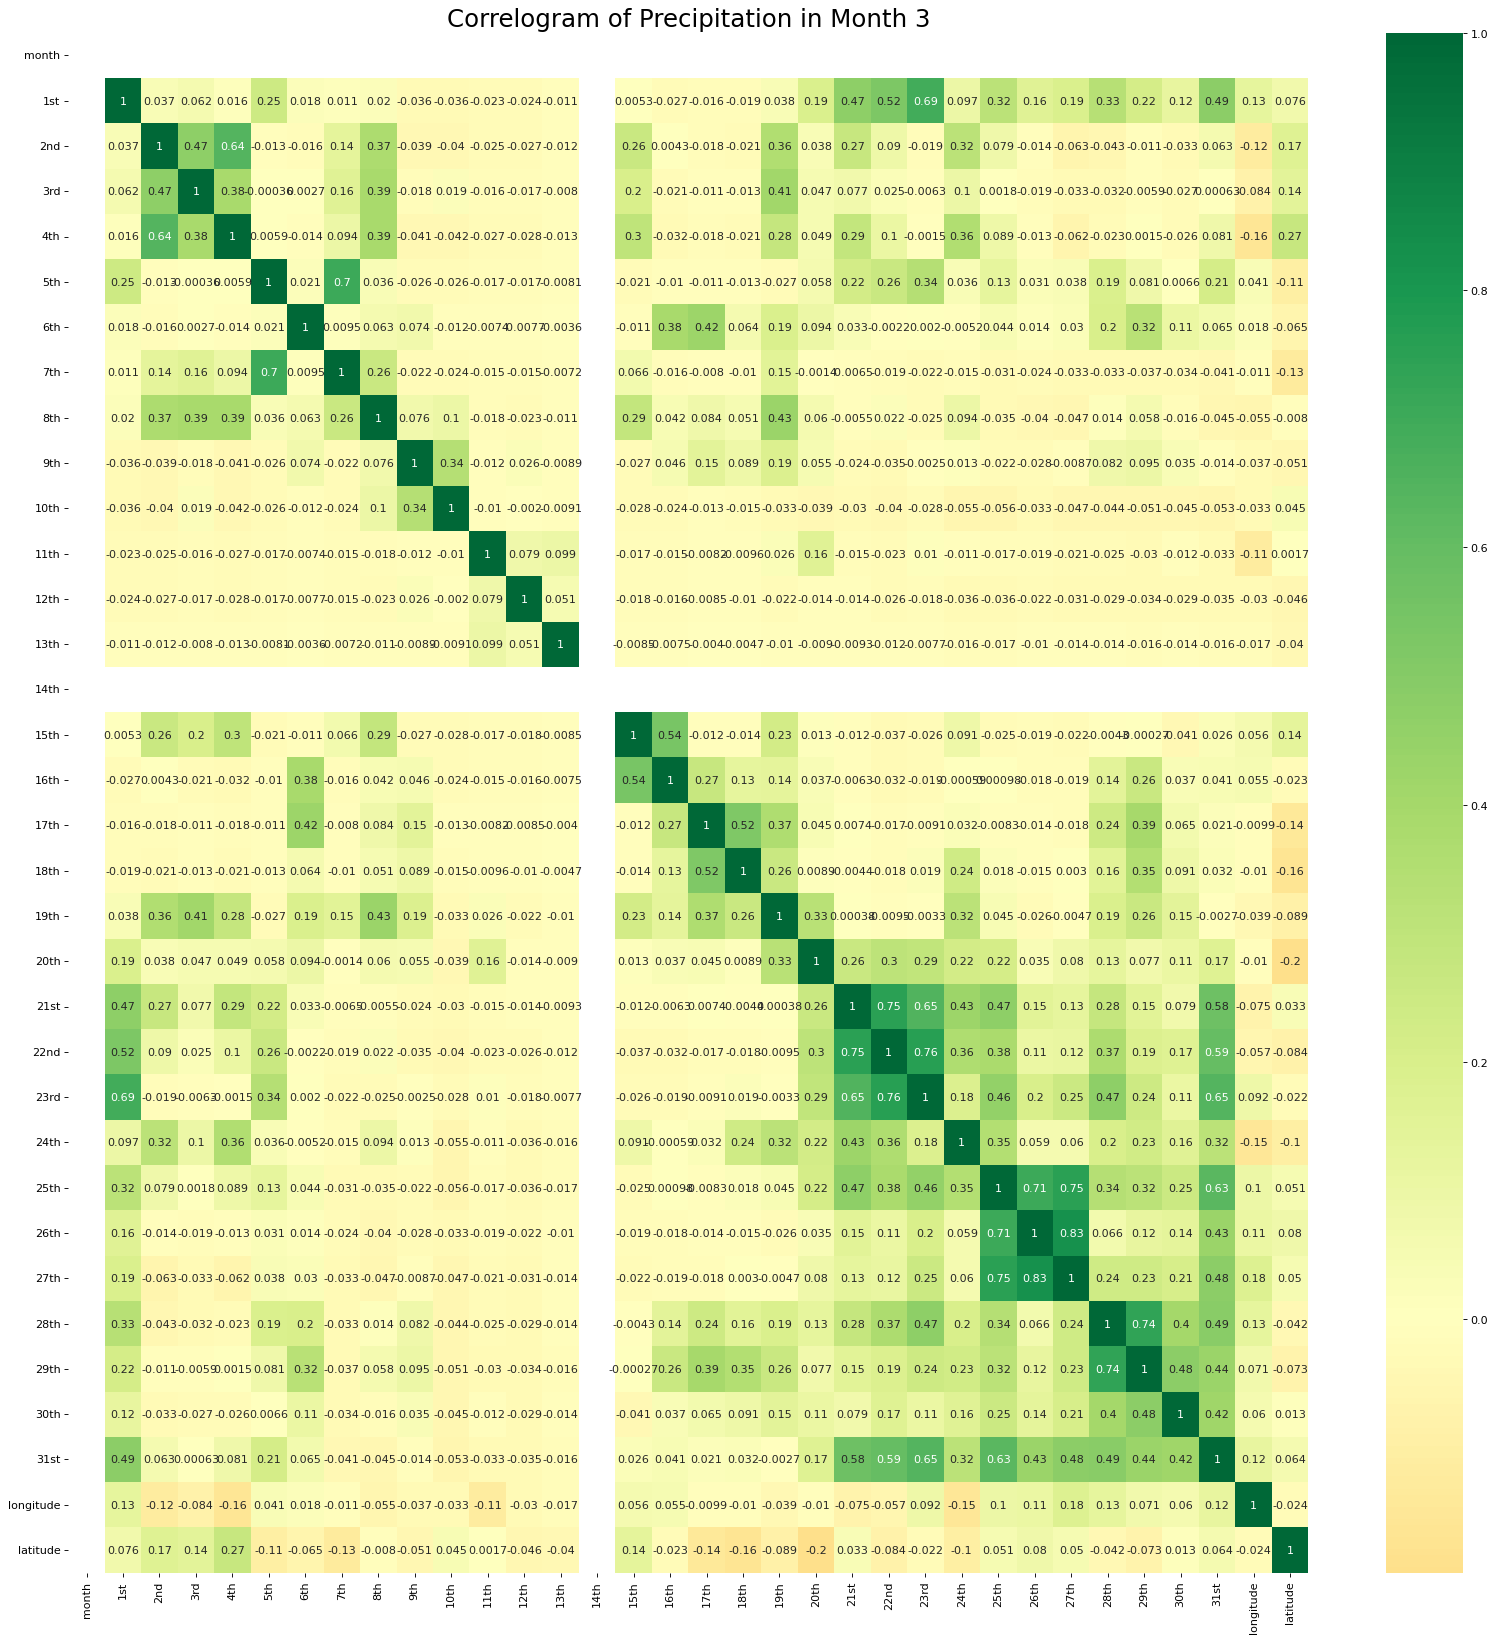

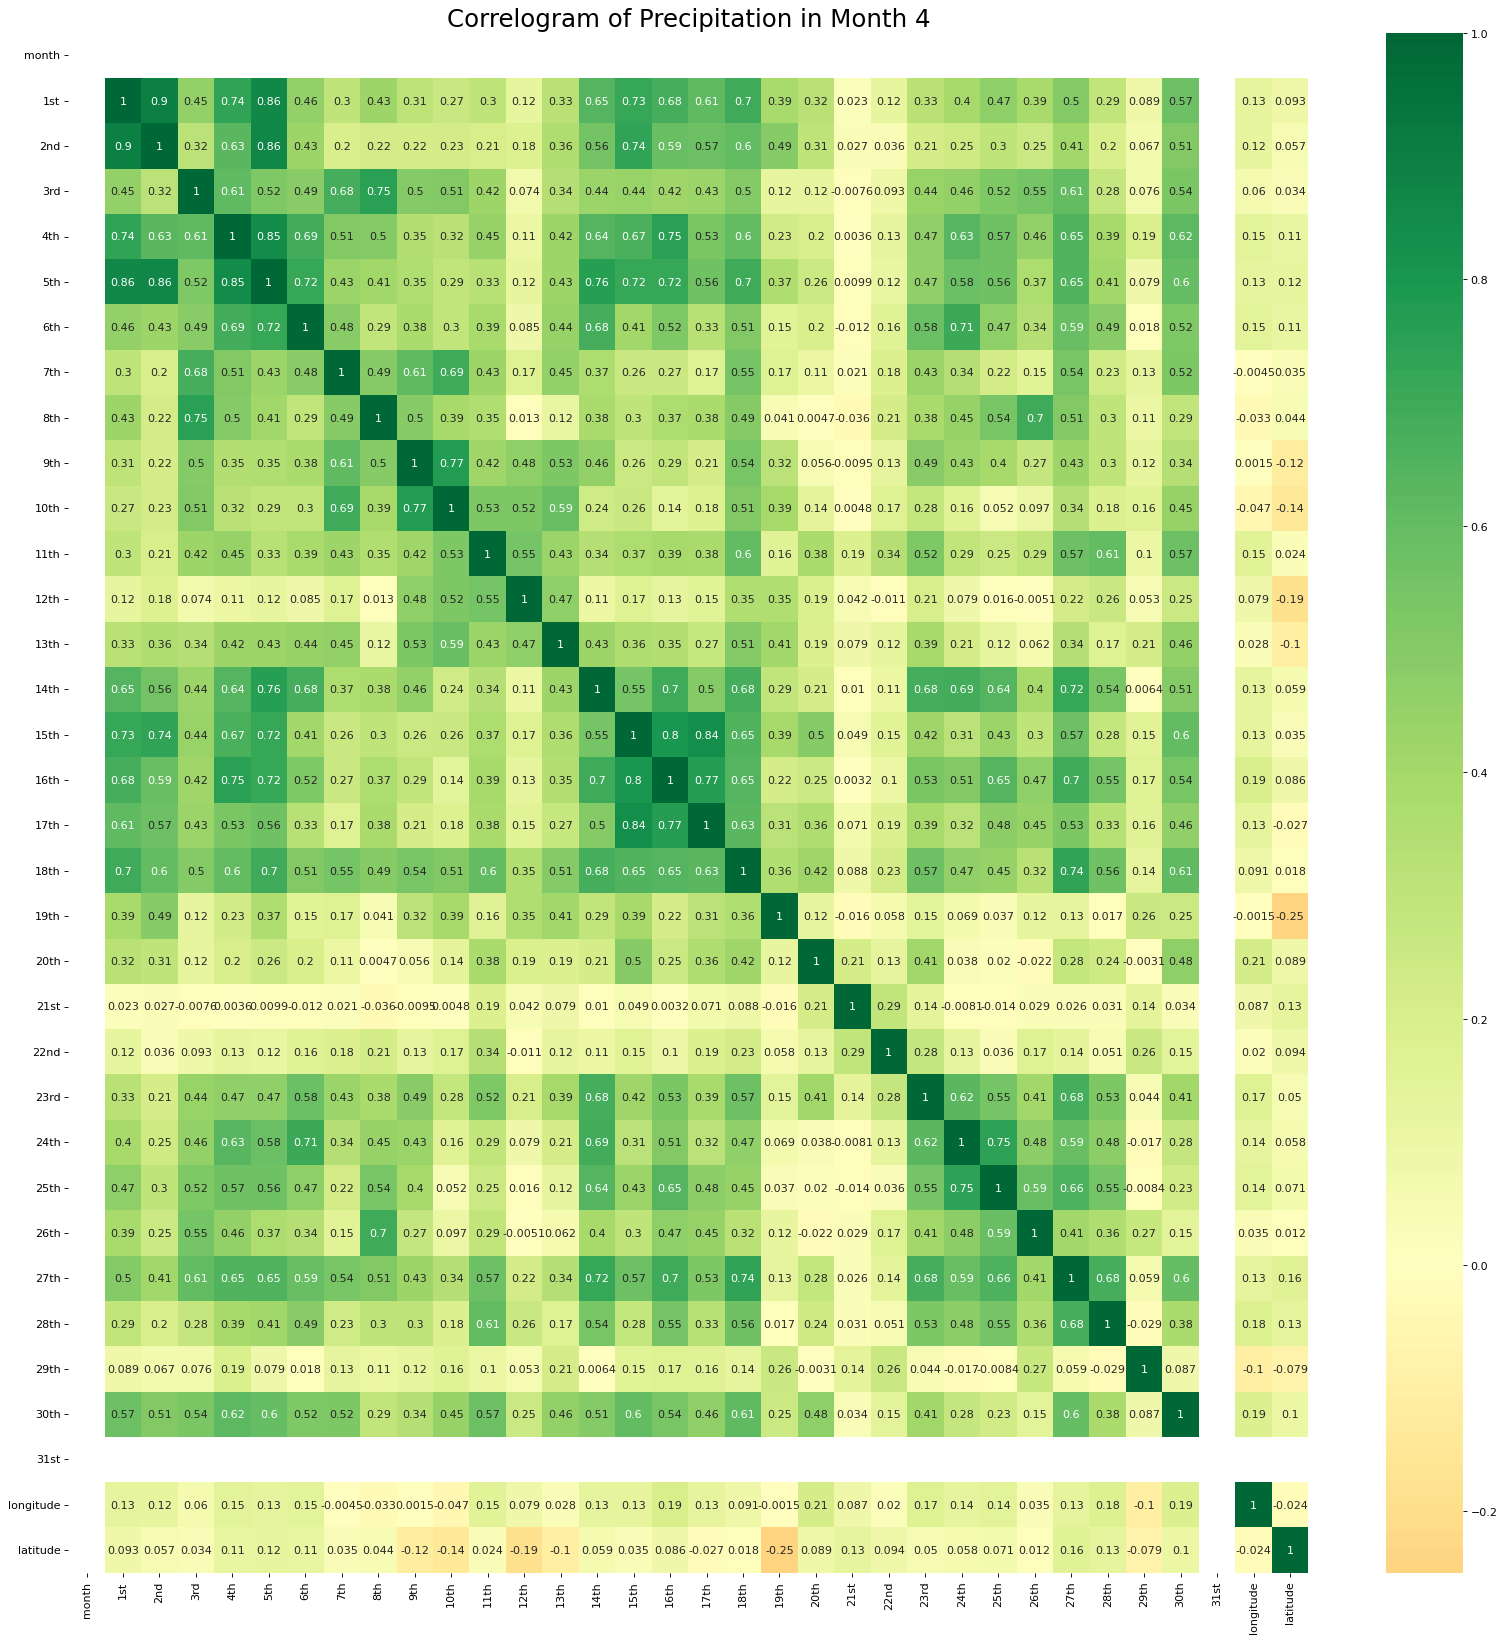

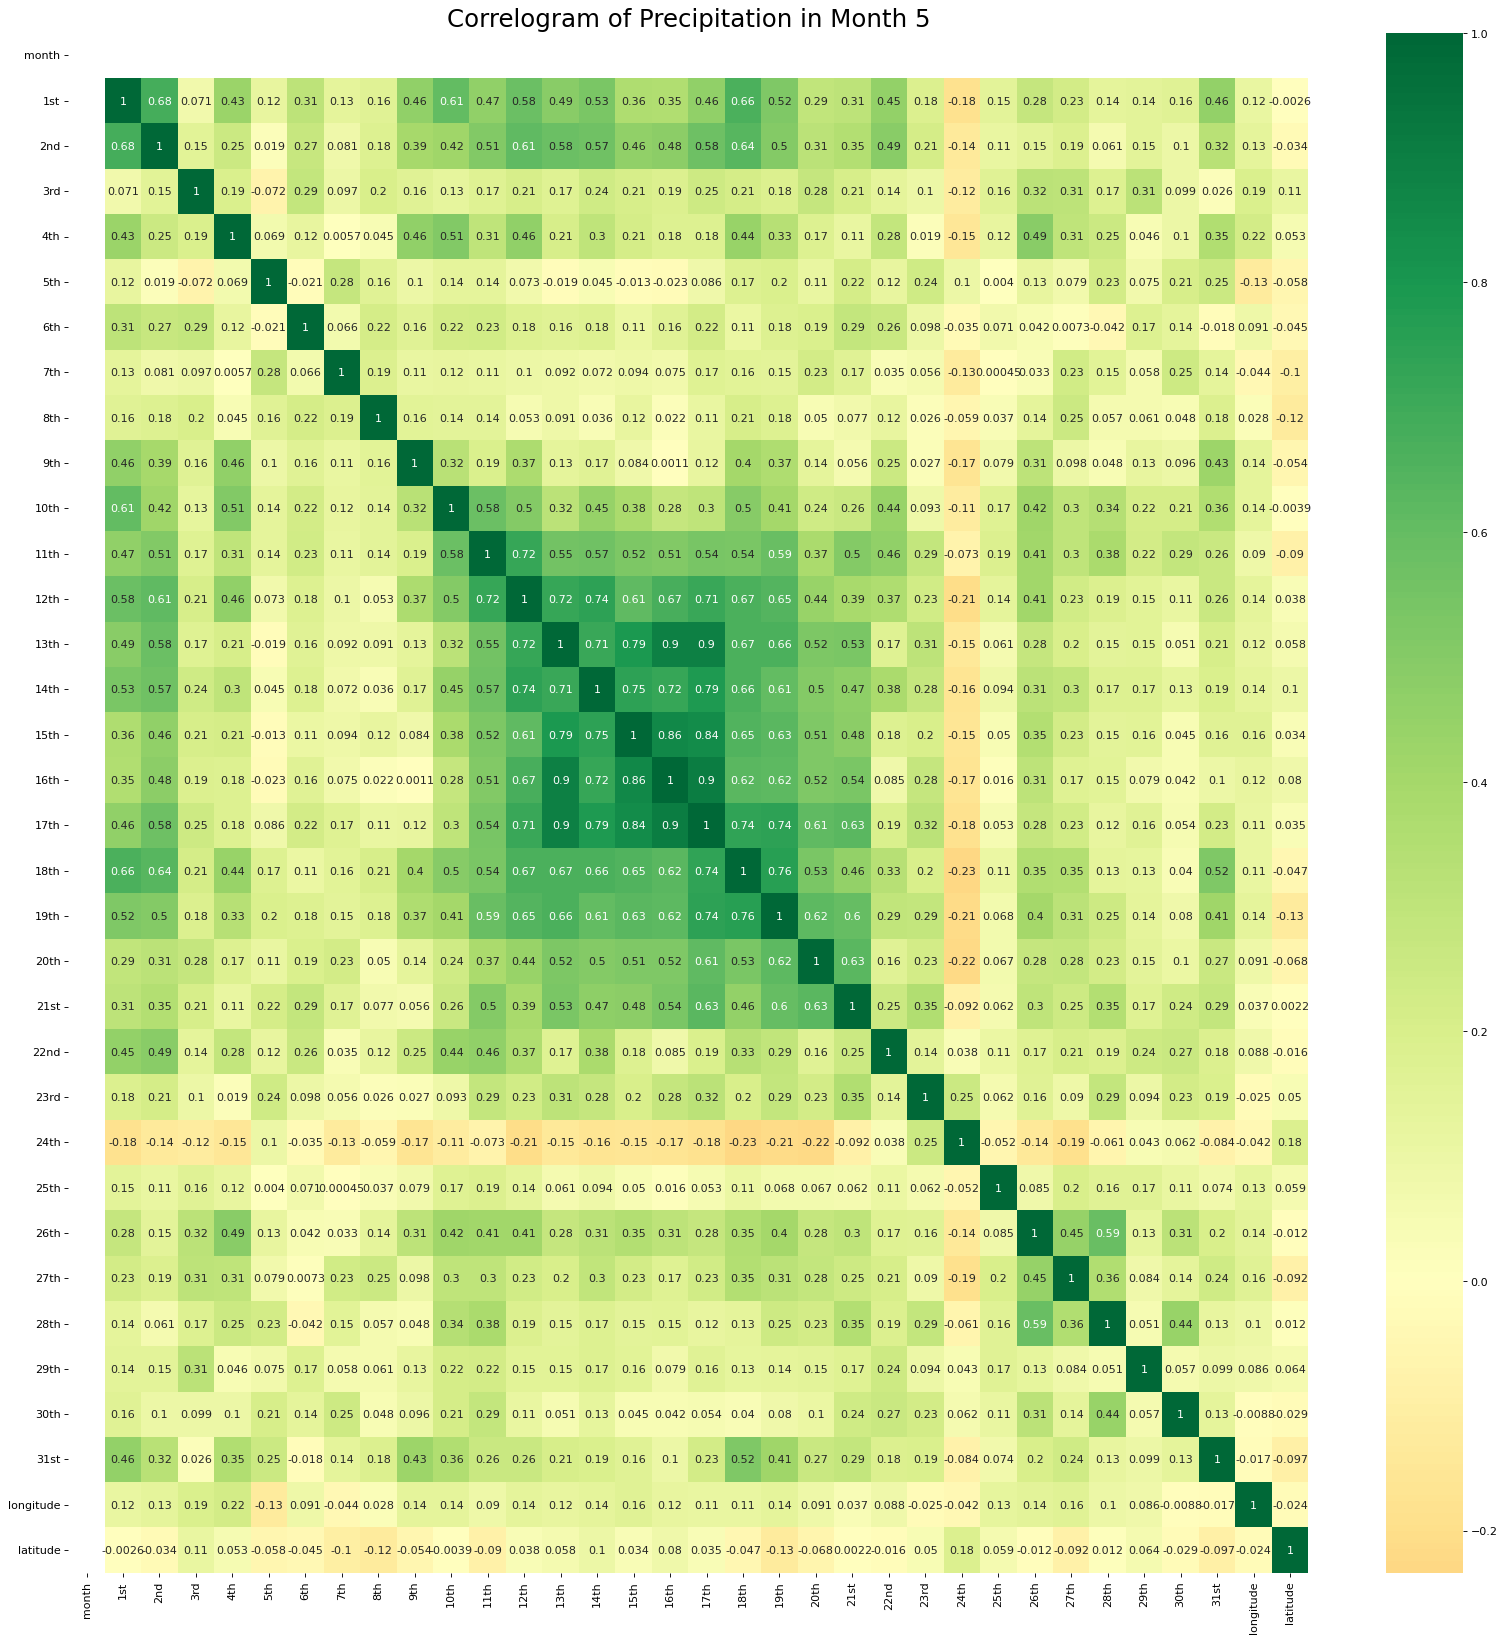

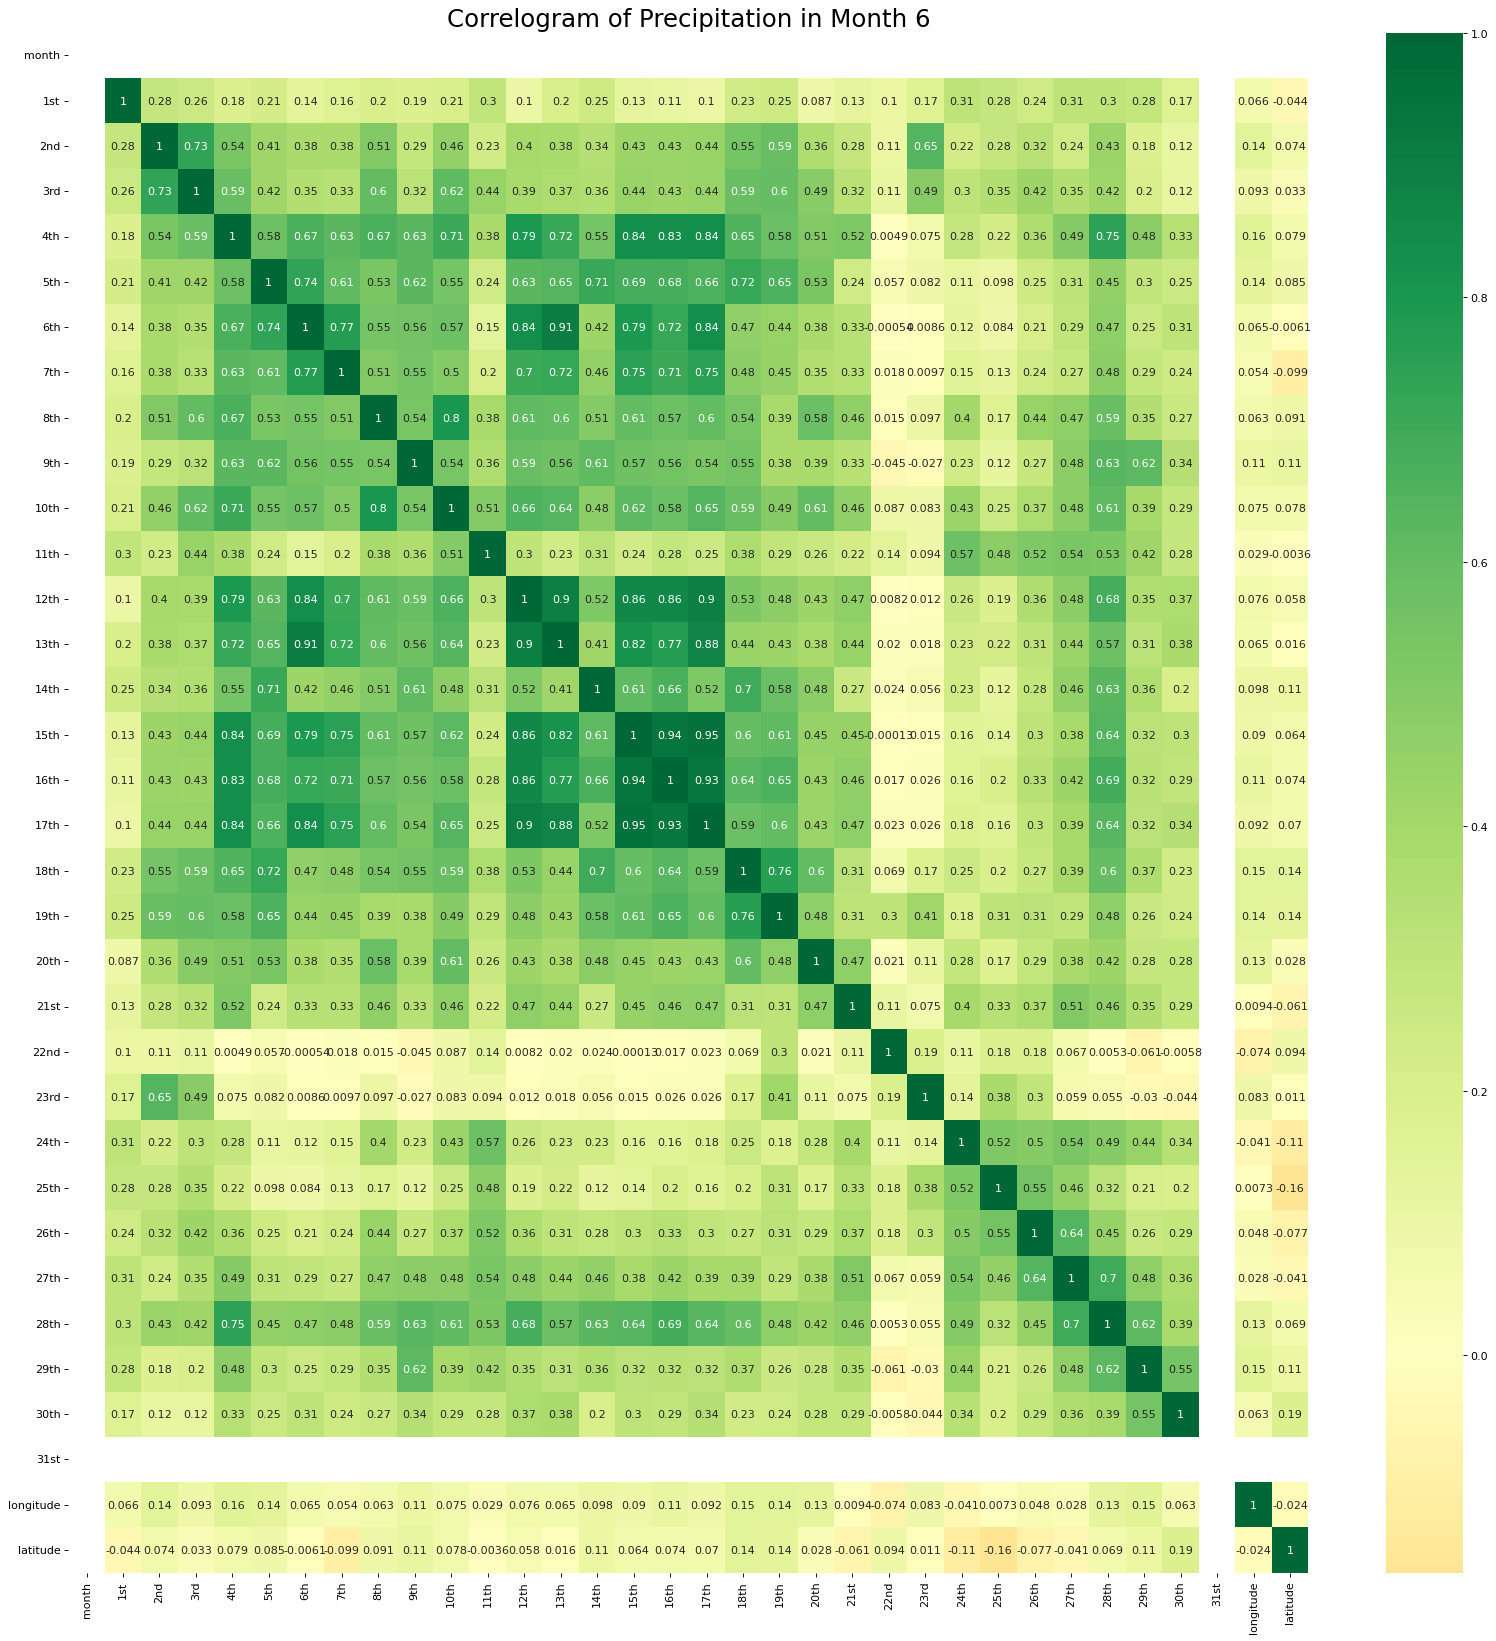

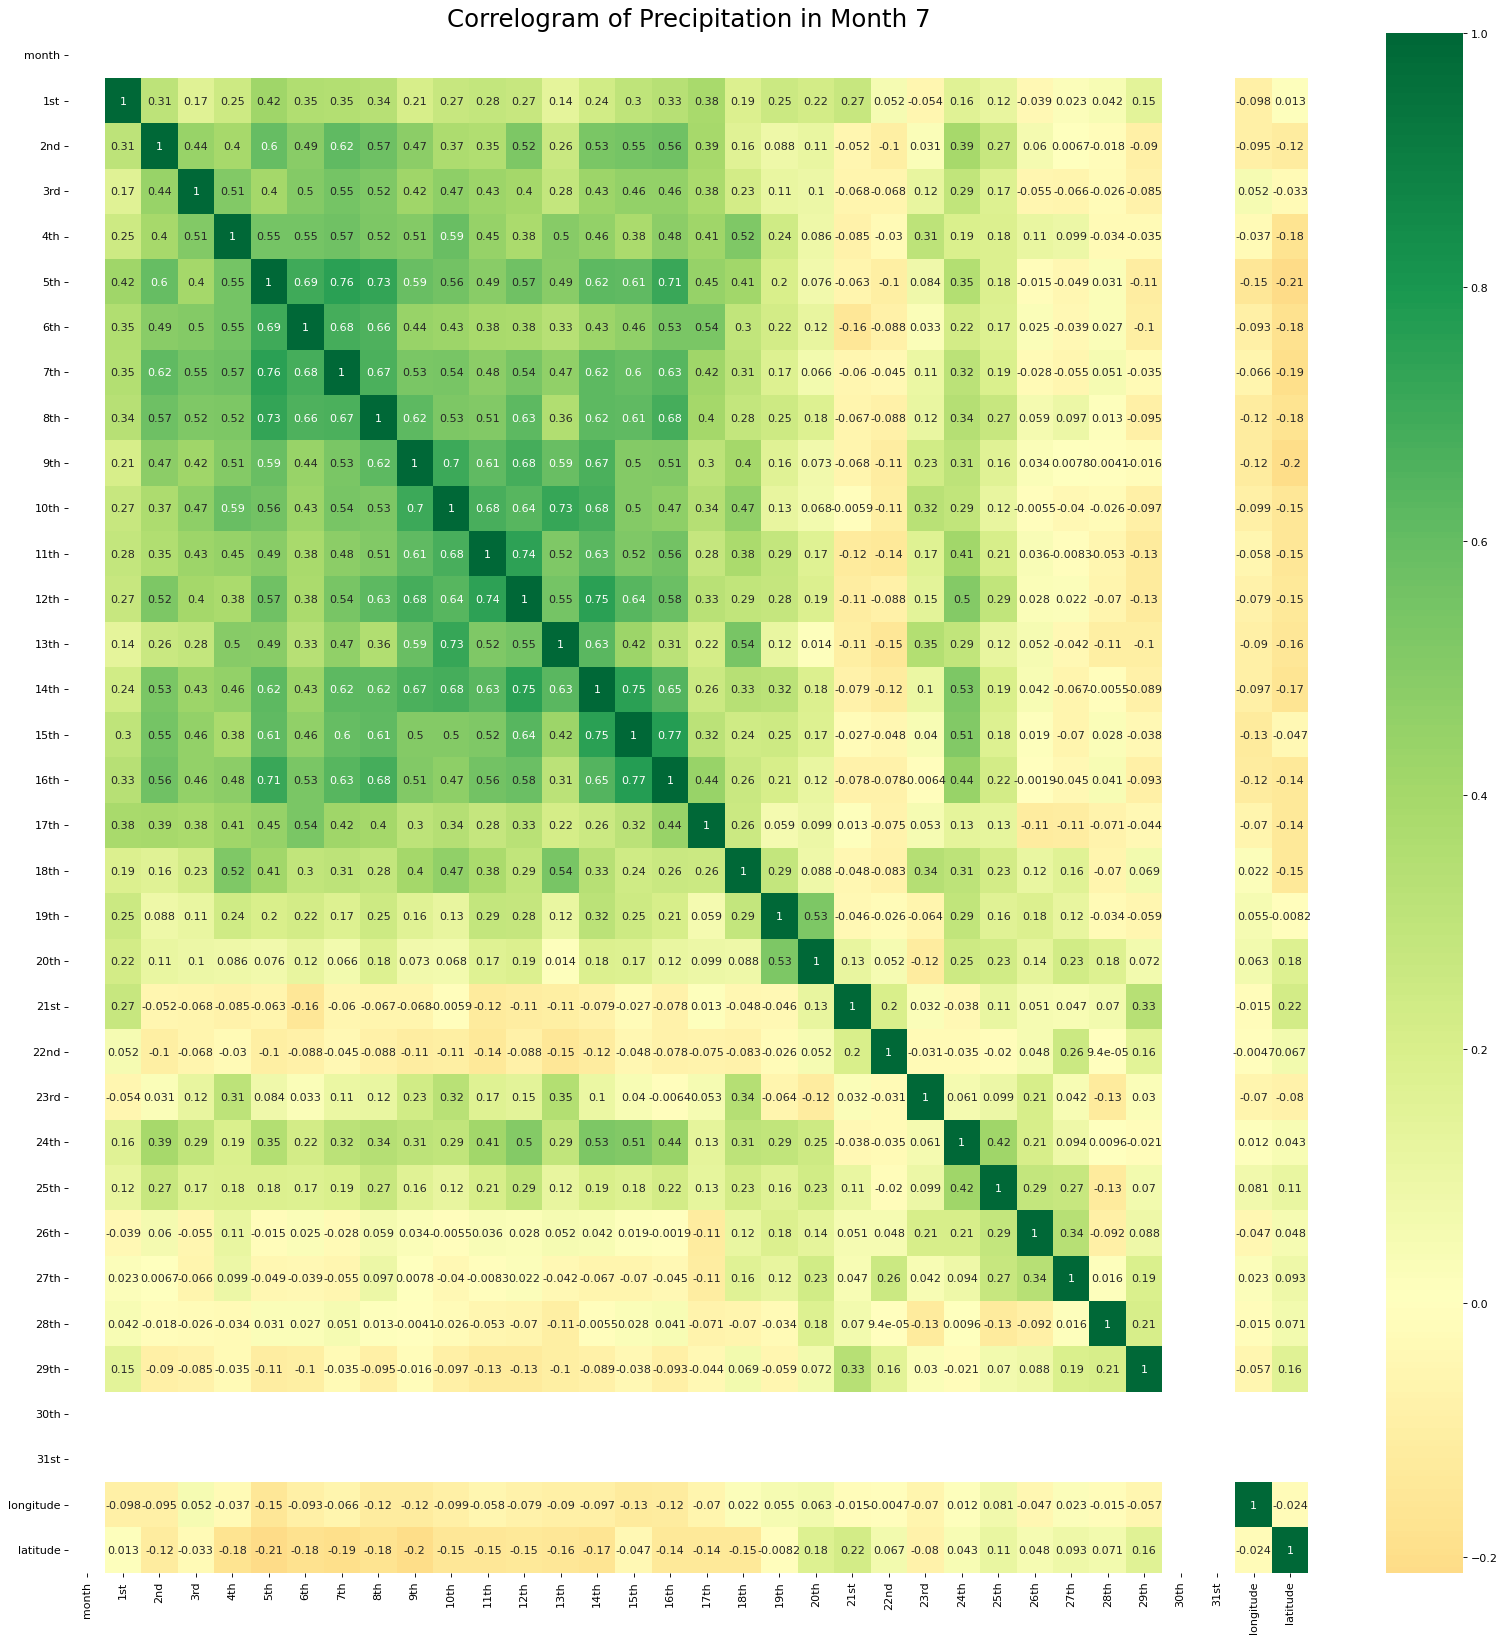

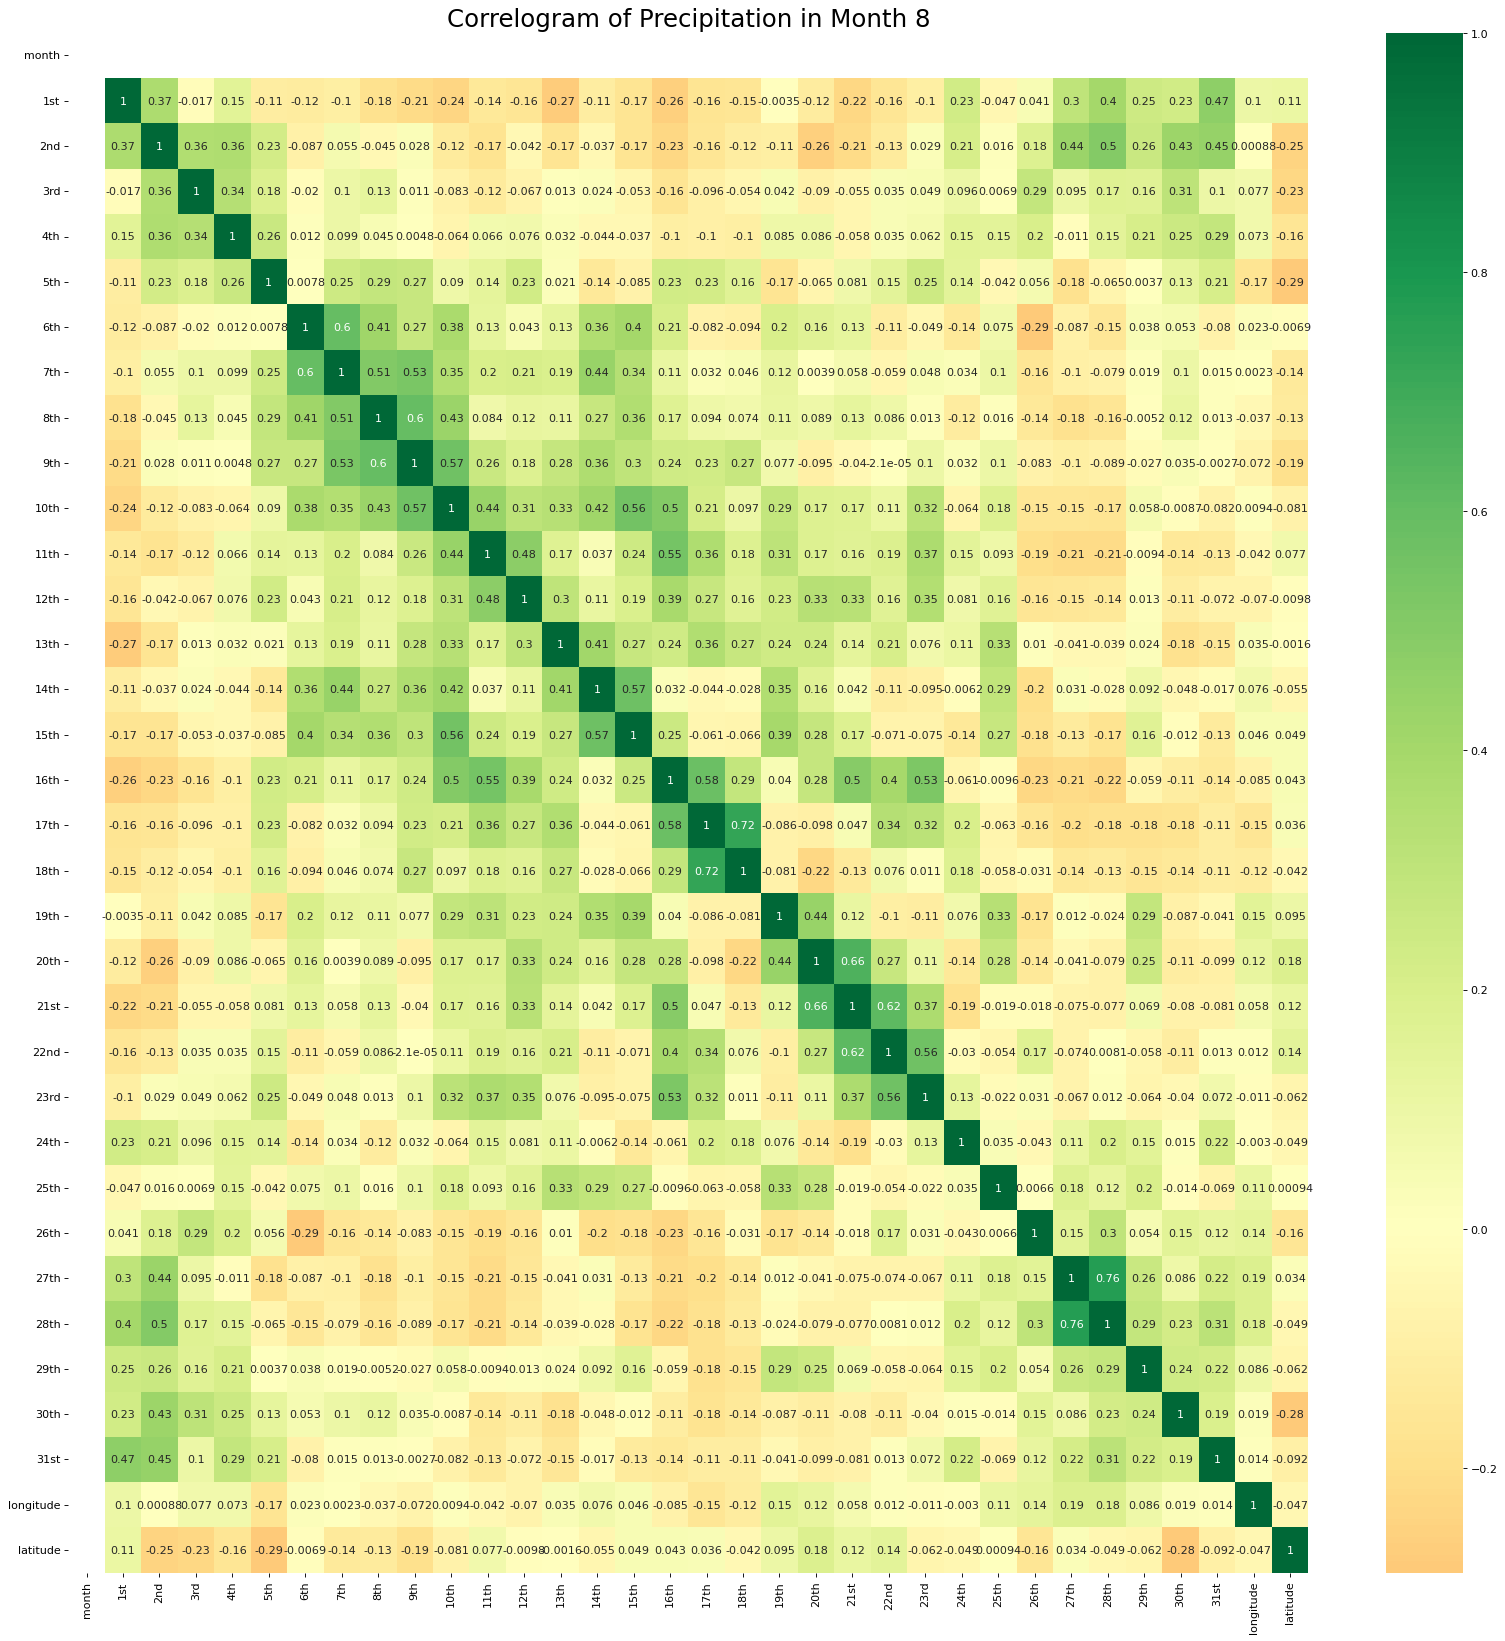

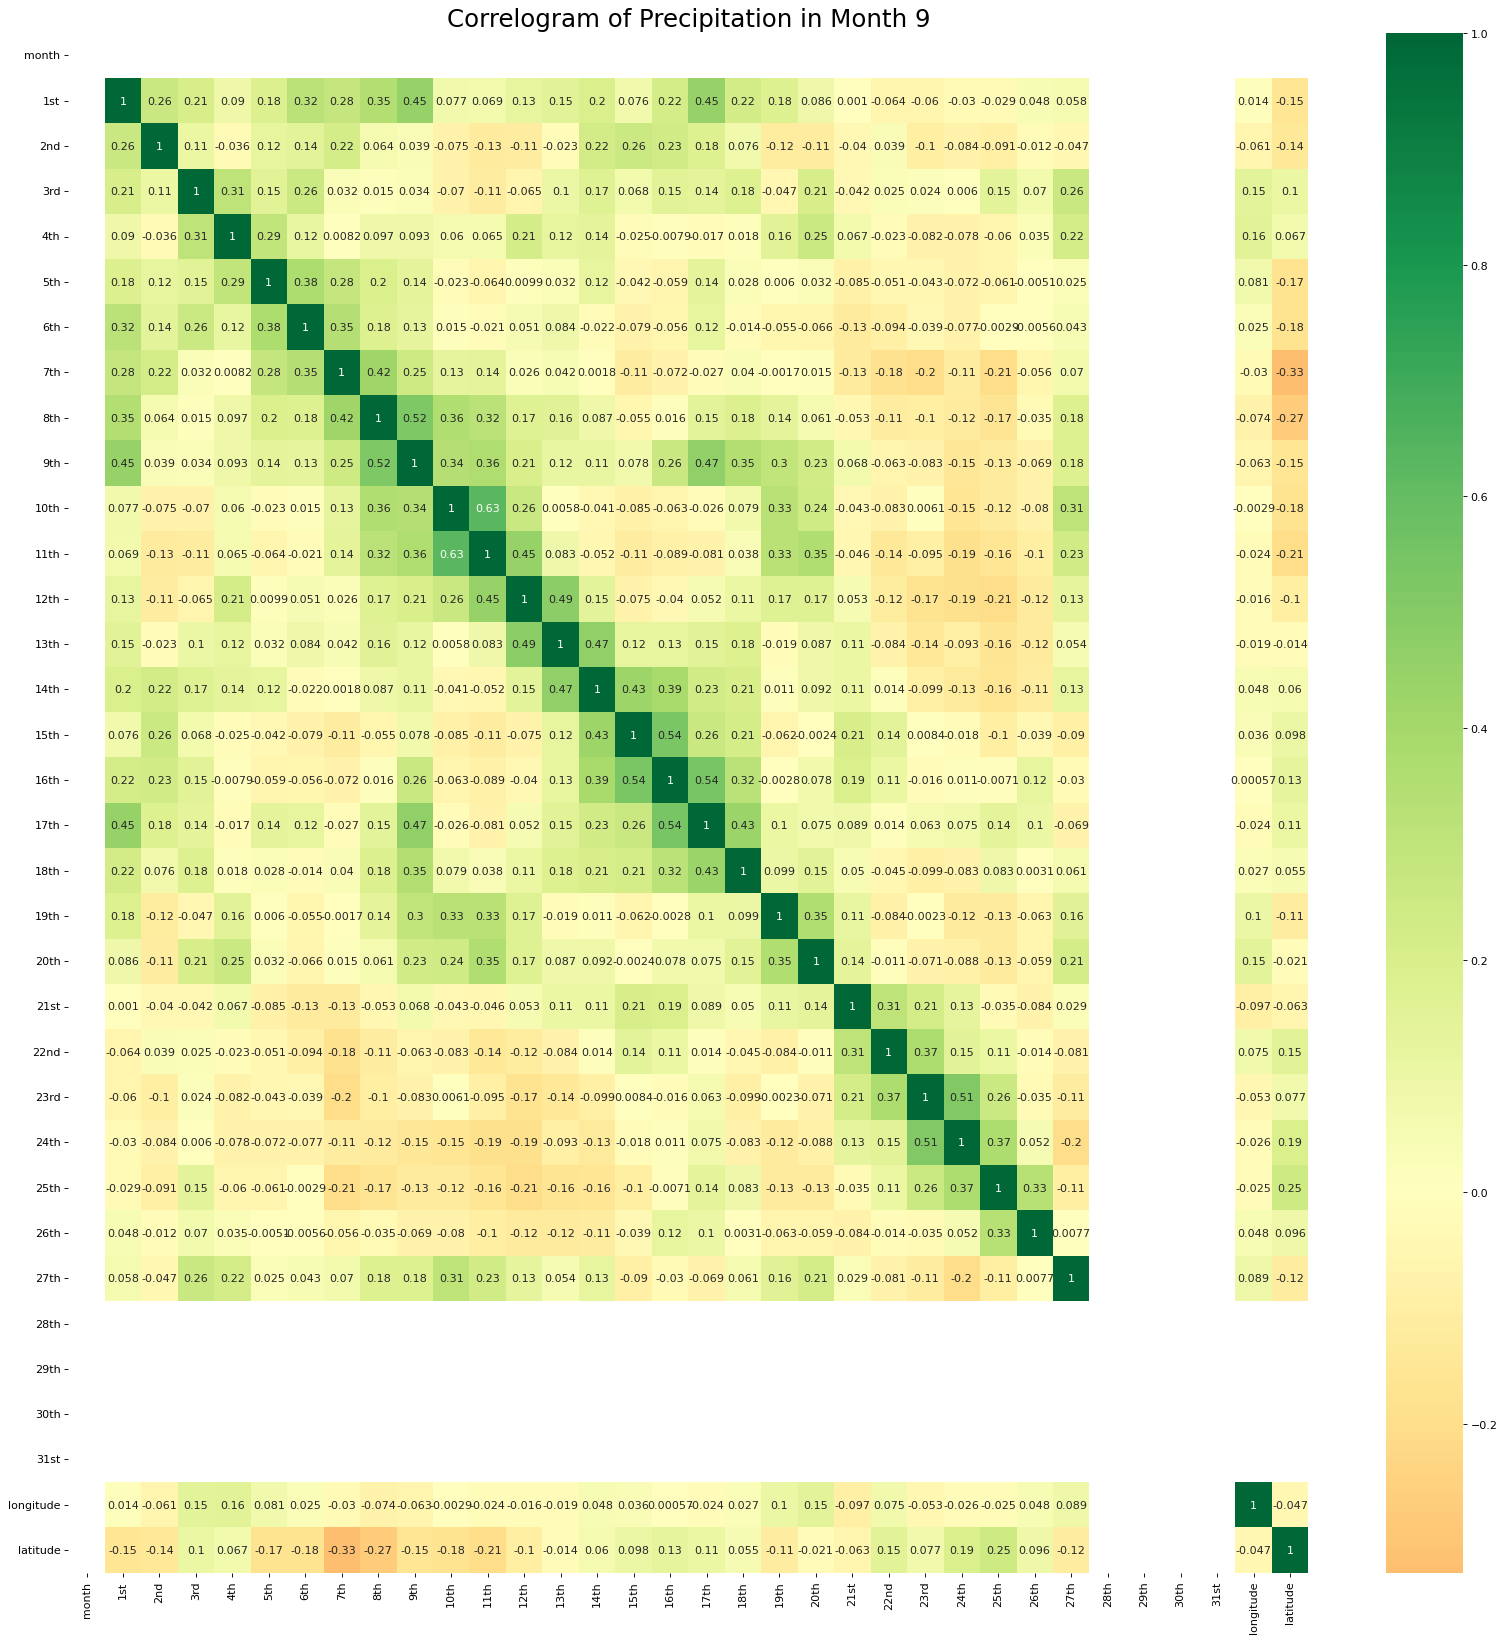

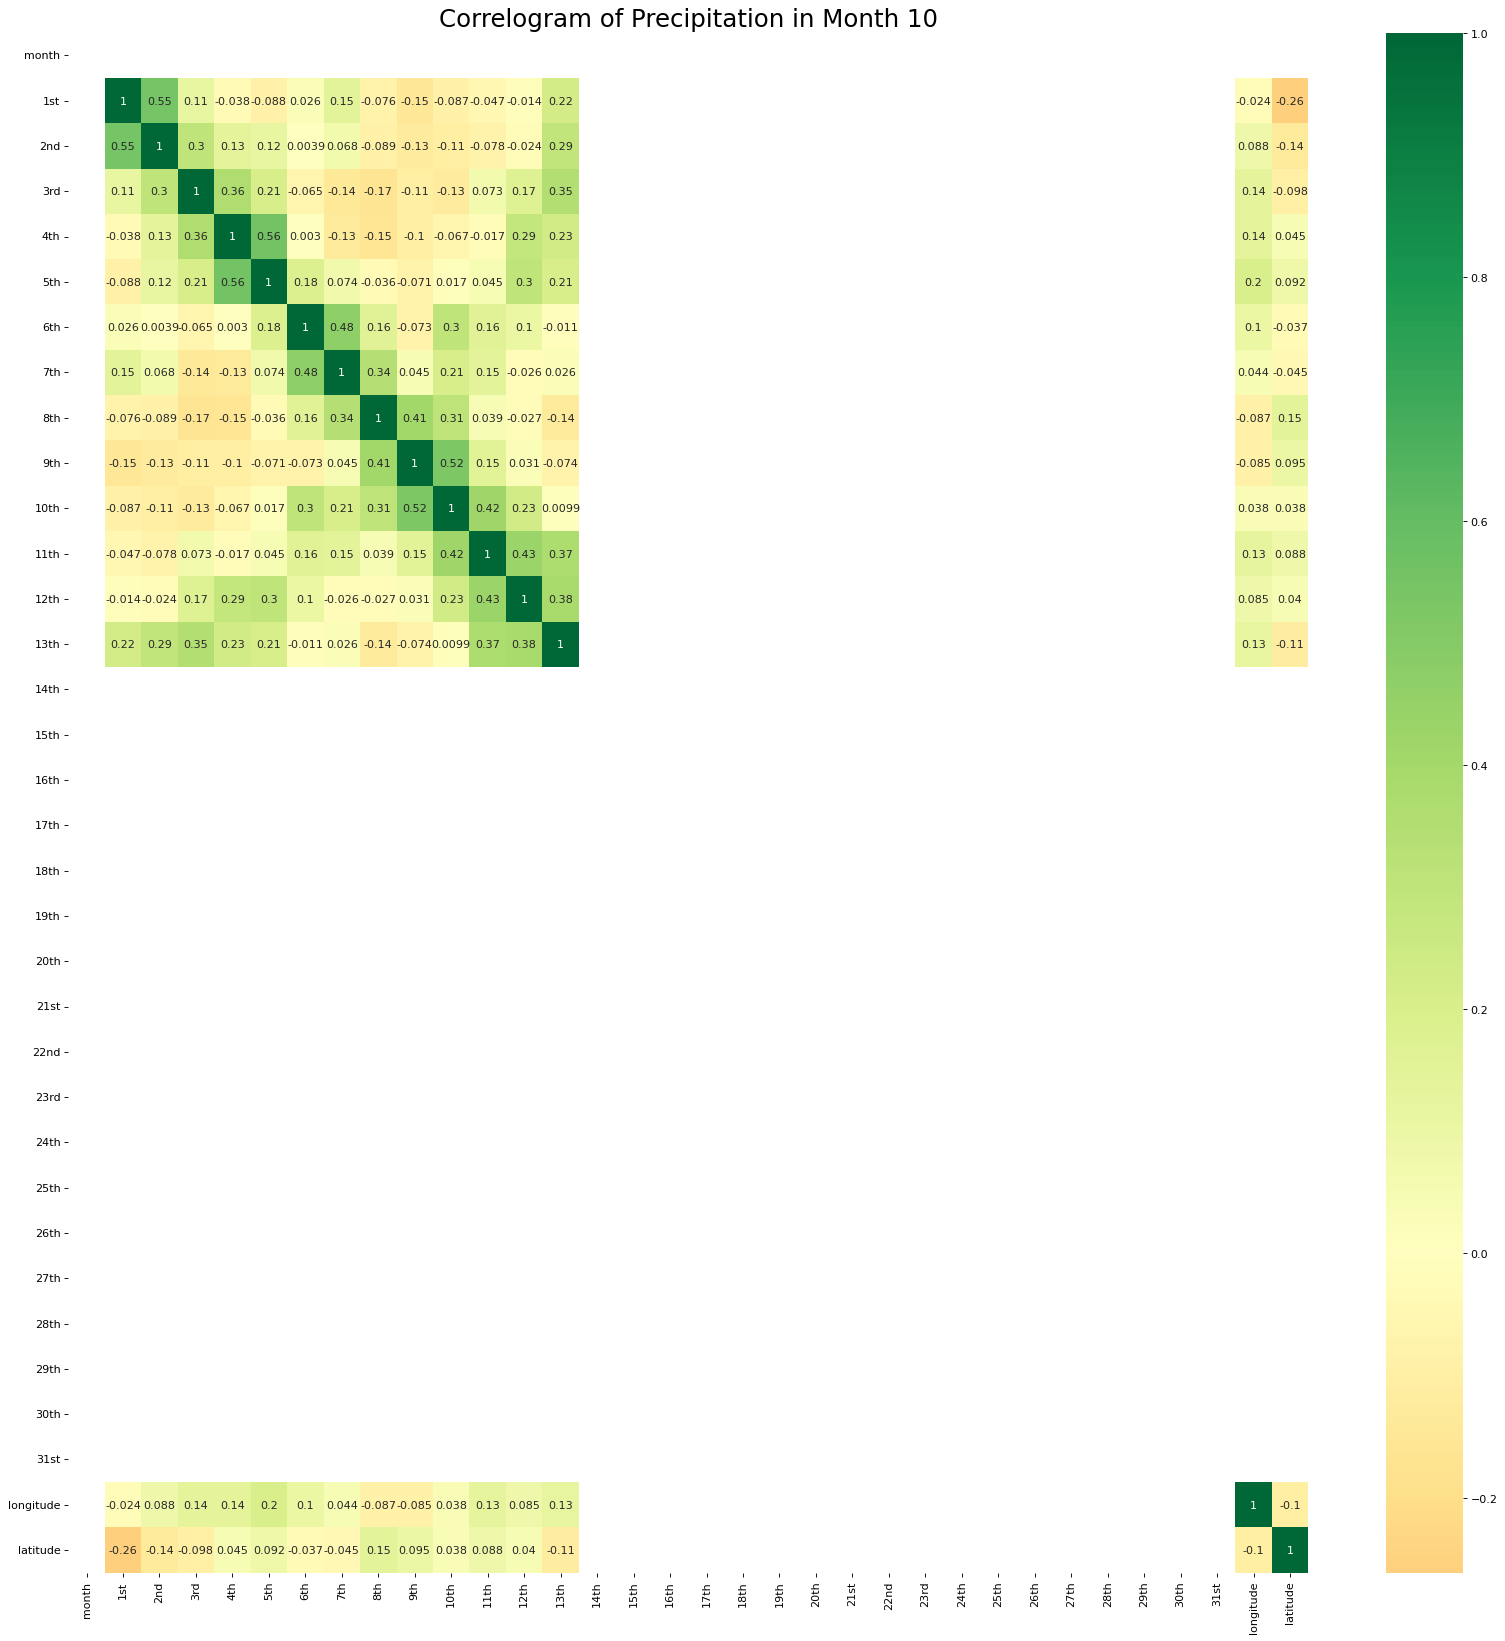

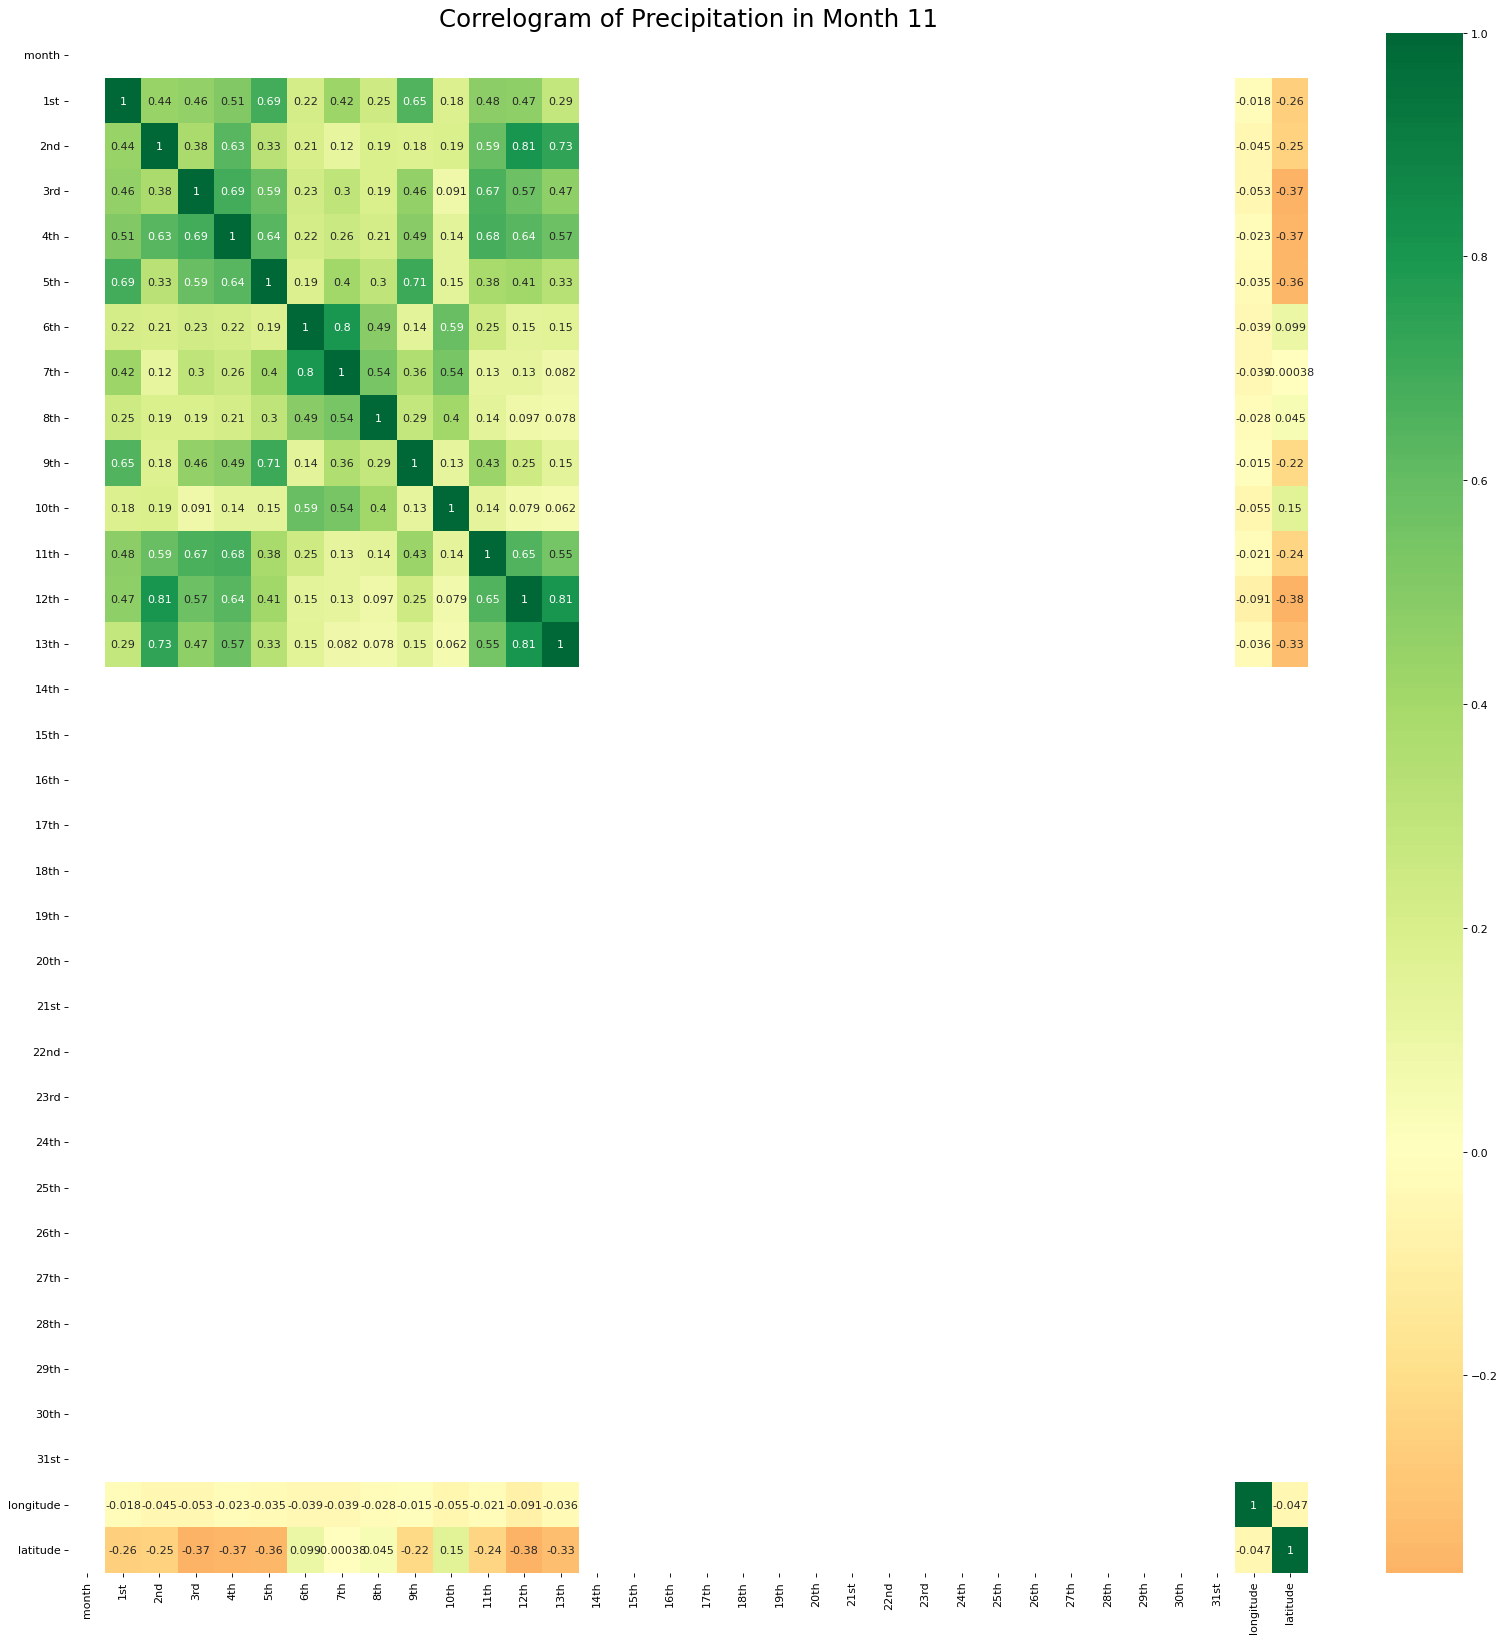

In [14]:
for i in range(1,12):
    temp = new_df.loc[new_df['month'] == i]
    plt.figure(figsize=(25,25), dpi= 80)
    sns.heatmap(temp.corr(), xticklabels=temp.corr().columns, yticklabels=temp.corr().columns, cmap='RdYlGn', center=0, annot=True)

    # Decorations
    plt.title(f'Correlogram of Precipitation in Month {i}', fontsize=22)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

We see that the best predictor of what will happen tomorrow is what is happening today and this trend is generally the preceding day. However, we can see that there is a stronger correlation beyond just one day prior which depends on the month. 